In [1]:
import pandas as pd
import numpy as np
import sonny_acquire
import prepare
import acquire

In [2]:
df = pd.read_csv('new_repos_dict.csv')
df['category'] = 'unknown'
df.loc[:200, 'category'] = 'gasoline'
df.loc[200:400, 'category'] = 'wind_energy'
df.loc[400:, 'category'] = 'solar_power'
df = df[['language','category','repo','readme_contents']]
df.head()

,language,category,repo,readme_contents
0,C,gasoline,N-BodyShop/gasoline,```\n \t ▄████ ▄▄▄ ██████ ▒█████ █...
1,OCaml,gasoline,michipili/gasoline,# Gasoline\n\nThe Gasoline project aims at imp...
2,TypeScript,gasoline,rvikmanis/gasoline,# Gasoline\n\nConvenient state container for R...
3,Python,gasoline,iggisv9t/benzin_gif,# benzin_gif\nCreate animated gifs that looks ...
4,Go,gasoline,daneharrigan/gasoline,# gasoline\n\n![Gasoline Dashboard](http://cl....


In [3]:
df[df.language.isna()].category.value_counts()

wind_energy    16
solar_power    15
gasoline       12
Name: category, dtype: int64

In [4]:
df = prepare.prep_repo_data(df)
df.dropna(inplace=True)
df = df.reset_index(drop=True)

In [5]:
df.head()

,language,category,repo,readme_contents,clean_tokes,clean_stemmed,clean_lemmatized
0,C,gasoline,N-BodyShop/gasoline,```\n \t ▄████ ▄▄▄ ██████ ▒█████ █...,"[&#9;, &#9;, &#9;, &#9;, &#9;, &#9;, &#9;, &#9...",&#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; g...,&#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; g...
1,OCaml,gasoline,michipili/gasoline,# Gasoline\n\nThe Gasoline project aims at imp...,"[gasoline, the, gasoline, project, aims, at, i...",gasolin gasolin project aim implement unixish ...,gasoline gasoline project aim implementing uni...
2,TypeScript,gasoline,rvikmanis/gasoline,# Gasoline\n\nConvenient state container for R...,"[gasoline, convenient, state, container, for, ...",gasolin conveni state contain react instal npm...,gasoline convenient state container react inst...
3,Python,gasoline,iggisv9t/benzin_gif,# benzin_gif\nCreate animated gifs that looks ...,"[benzin_gif, create, animated, gifs, that, loo...",benzin_gif creat anim gif look like gasolin pu...,benzin_gif create animated gifs look like gaso...
4,Go,gasoline,daneharrigan/gasoline,# gasoline\n\n![Gasoline Dashboard](http://cl....,"[gasoline, gasoline, dashboardhttpcllyimage3l1...",gasolin gasolin dashboardhttpcllyimage3l190u3q...,gasoline gasoline dashboardhttpcllyimage3l190u...


In [6]:
df = df[df.index!=135]
df = df[df.index!=269]

In [7]:
df.shape

(408, 7)

In [8]:
df.category.value_counts()

solar_power    151
wind_energy    135
gasoline       122
Name: category, dtype: int64

In [9]:
df['word_count'] = df.clean_lemmatized.str.split().apply(len)

In [10]:
df = df.replace('Matlab','MATLAB')

## Exploration

- What are the most common words in READMEs?
- What does the distribution of IDFs look like for the most common words?
- Does the length of the README vary by programming language?
- Do different programming languages use a different number of unique words?

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import nltk.sentiment
import re

In [39]:
plt.rc('figure', figsize=(14,8))
plt.rc('font', size=13)

Text(0.5, 0, 'Number of occurances')

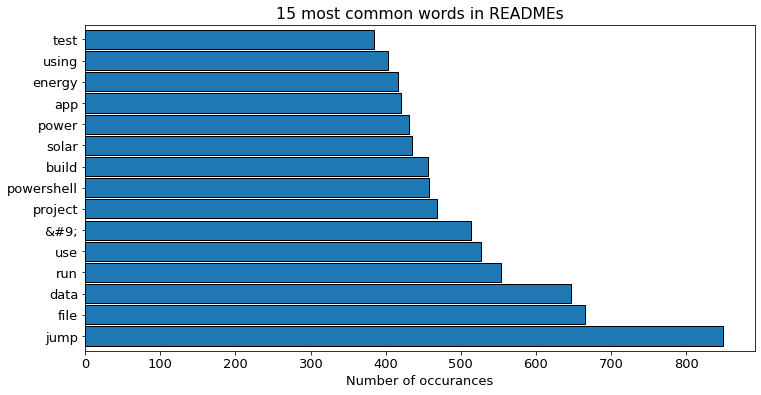

In [40]:
# What are the most common words in READMEs?
all_words = ' '.join(df.clean_lemmatized).split()
plt.figure(figsize=(12,6))
pd.Series(all_words).value_counts().head(15).plot.barh(width=.9, ec='black', title='15 most common words in READMEs')
plt.xlabel('Number of occurances')

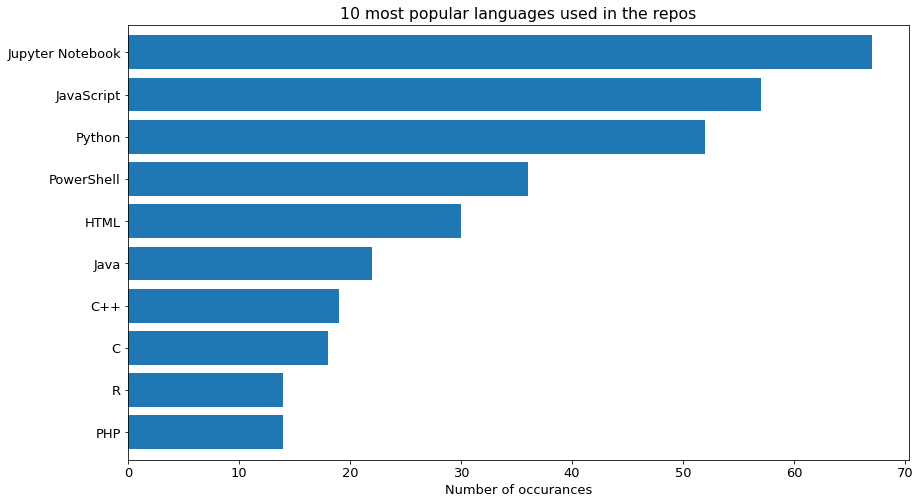

In [41]:
plt.figure(figsize=(14,8))
df.language.value_counts().sort_values(ascending=True).tail(10).plot.barh(width=.8)
plt.title('10 most popular languages used in the repos')
plt.xlabel('Number of occurances')
plt.show()

- Does the length of the README vary by programming language?

In [14]:
df.head()

,language,category,repo,readme_contents,clean_tokes,clean_stemmed,clean_lemmatized,word_count
0,C,gasoline,N-BodyShop/gasoline,```\n \t ▄████ ▄▄▄ ██████ ▒█████ █...,"[&#9;, &#9;, &#9;, &#9;, &#9;, &#9;, &#9;, &#9...",&#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; g...,&#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; g...,105
1,OCaml,gasoline,michipili/gasoline,# Gasoline\n\nThe Gasoline project aims at imp...,"[gasoline, the, gasoline, project, aims, at, i...",gasolin gasolin project aim implement unixish ...,gasoline gasoline project aim implementing uni...,345
2,TypeScript,gasoline,rvikmanis/gasoline,# Gasoline\n\nConvenient state container for R...,"[gasoline, convenient, state, container, for, ...",gasolin conveni state contain react instal npm...,gasoline convenient state container react inst...,27
3,Python,gasoline,iggisv9t/benzin_gif,# benzin_gif\nCreate animated gifs that looks ...,"[benzin_gif, create, animated, gifs, that, loo...",benzin_gif creat anim gif look like gasolin pu...,benzin_gif create animated gifs look like gaso...,61
4,Go,gasoline,daneharrigan/gasoline,# gasoline\n\n![Gasoline Dashboard](http://cl....,"[gasoline, gasoline, dashboardhttpcllyimage3l1...",gasolin gasolin dashboardhttpcllyimage3l190u3q...,gasoline gasoline dashboardhttpcllyimage3l190u...,244


In [49]:
df.language.value_counts().head(10)

Jupyter Notebook    67
JavaScript          57
Python              52
PowerShell          36
HTML                30
Java                22
C++                 19
C                   18
PHP                 14
R                   14
Name: language, dtype: int64

In [50]:
df.groupby('language').word_count.mean().sort_values(ascending=False)

language
TSQL                 774.000000
Objective-C          563.000000
JavaScript           539.807018
Visual Basic         522.000000
OCaml                345.000000
Ruby                 320.400000
PostScript           264.000000
Scala                245.000000
Python               224.750000
HTML                 206.766667
R                    204.785714
Makefile             187.000000
Go                   147.500000
Jupyter Notebook     140.985075
Modelica             135.000000
MATLAB               130.923077
C++                  112.631579
M                    103.000000
CMake                101.000000
Java                  97.363636
C#                    96.666667
CSS                   91.900000
PowerShell            90.527778
Perl                  77.000000
Eagle                 72.000000
PHP                   70.857143
Arduino               66.000000
C                     64.944444
TypeScript            56.833333
ActionScript          49.000000
Processing            45.500000

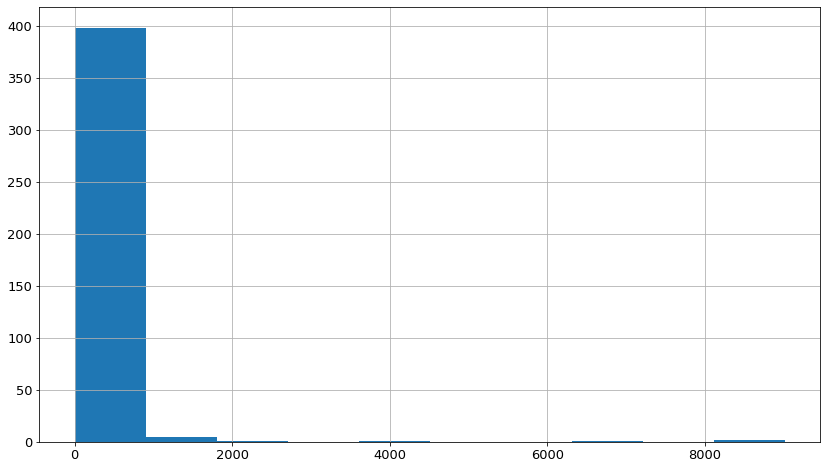

In [42]:
df.word_count.hist()

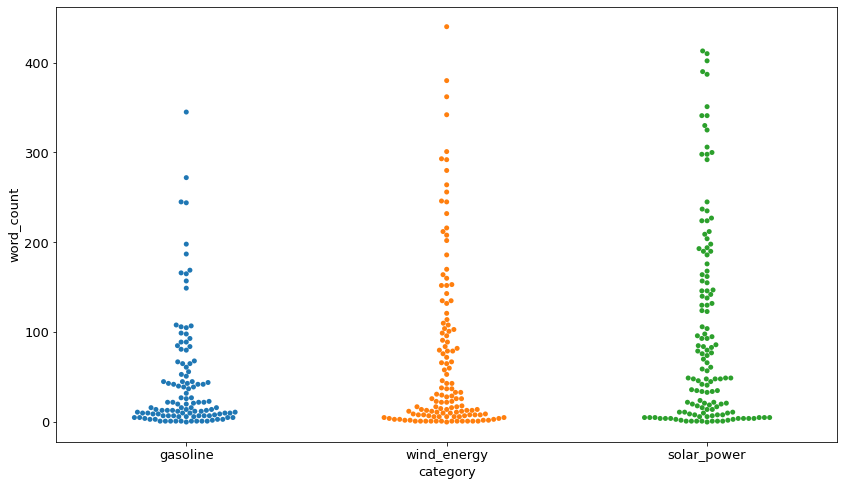

In [43]:
# swarm plot for energy category and README word counts
sns.swarmplot(x=df['category'], y=df[df.word_count < 500].word_count);

In [17]:
# get top 10 popular languages
top_language = list(df.language.value_counts().head(10).index)
top_language
df[df.language.isin(top_language)].language

0                     C
3                Python
5                     C
7      Jupyter Notebook
8                Python
             ...       
403              Python
405          JavaScript
406    Jupyter Notebook
408                HTML
409                 PHP
Name: language, Length: 329, dtype: object

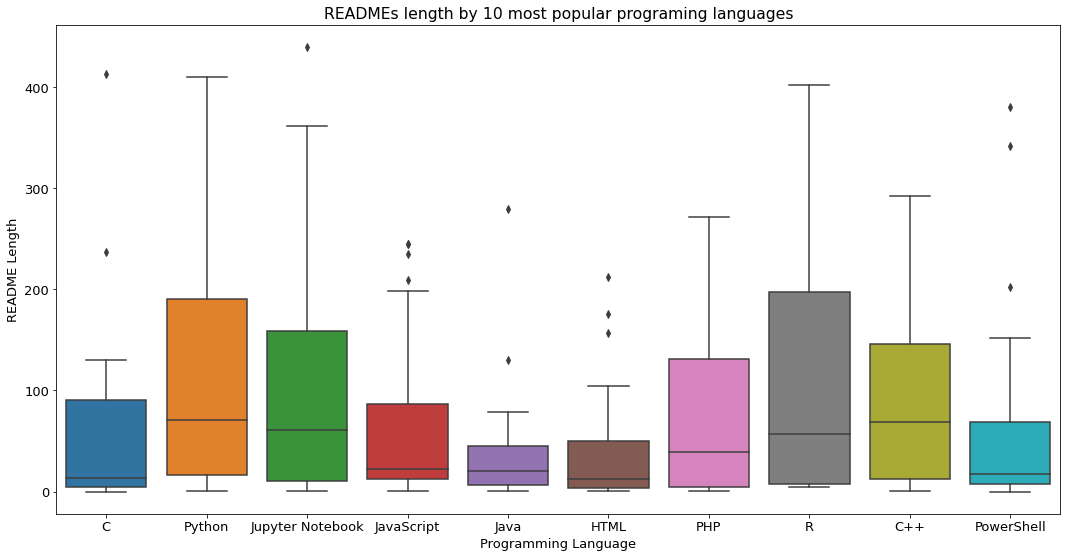

In [44]:
plt.figure(figsize=(18,9))
sns.boxplot(y=df[df.word_count < 500].word_count, x=df[df.language.isin(top_language)].language)
plt.title("READMEs length by 10 most popular programing languages")
plt.xlabel('Programming Language')
plt.ylabel('README Length')
plt.show()

## Word Clouds

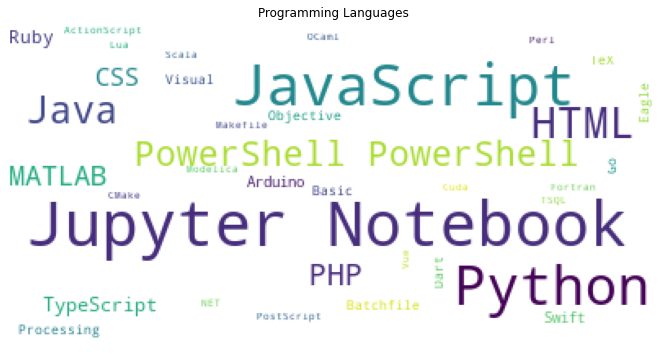

In [19]:
from wordcloud import WordCloud
# Look at the programming language value counts and create a word cloud of the words
all_cloud = WordCloud(background_color='white').generate(' '.join(df.language))
plt.figure(figsize=(12, 6))
plt.imshow(all_cloud)
plt.title('Programming Languages')
plt.axis('off')
plt.show()

(-0.5, 1199.5, 899.5, -0.5)

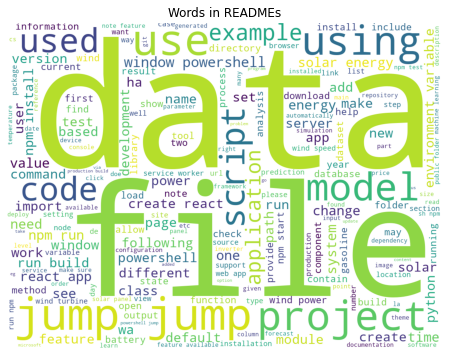

In [20]:
all_words = " ".join(df.clean_lemmatized).split()
text = ' '.join(all_words)
wc = WordCloud(background_color='white', width=1200, height=900)
img = wc.generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(img)
plt.title('Words in READMEs')
plt.axis('off')

## Hypothesis Testing 

### Chi Square test

In [21]:
from scipy import stats

In [22]:
df.head()

,language,category,repo,readme_contents,clean_tokes,clean_stemmed,clean_lemmatized,word_count
0,C,gasoline,N-BodyShop/gasoline,```\n \t ▄████ ▄▄▄ ██████ ▒█████ █...,"[&#9;, &#9;, &#9;, &#9;, &#9;, &#9;, &#9;, &#9...",&#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; g...,&#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; g...,105
1,OCaml,gasoline,michipili/gasoline,# Gasoline\n\nThe Gasoline project aims at imp...,"[gasoline, the, gasoline, project, aims, at, i...",gasolin gasolin project aim implement unixish ...,gasoline gasoline project aim implementing uni...,345
2,TypeScript,gasoline,rvikmanis/gasoline,# Gasoline\n\nConvenient state container for R...,"[gasoline, convenient, state, container, for, ...",gasolin conveni state contain react instal npm...,gasoline convenient state container react inst...,27
3,Python,gasoline,iggisv9t/benzin_gif,# benzin_gif\nCreate animated gifs that looks ...,"[benzin_gif, create, animated, gifs, that, loo...",benzin_gif creat anim gif look like gasolin pu...,benzin_gif create animated gifs look like gaso...,61
4,Go,gasoline,daneharrigan/gasoline,# gasoline\n\n![Gasoline Dashboard](http://cl....,"[gasoline, gasoline, dashboardhttpcllyimage3l1...",gasolin gasolin dashboardhttpcllyimage3l190u3q...,gasoline gasoline dashboardhttpcllyimage3l190u...,244


$H_0$:  Using a programming language and being in a specific energy category are independent of each other.

$H_a$:  Using a programming language and being in a specific energy category are dependent on each other.

In [23]:
observed = pd.crosstab(df.category, df.language)
observed

language,ActionScript,Arduino,Batchfile,C,C#,C++,CMake,CSS,Cuda,Dart,...,R,Ruby,Scala,Swift,TSQL,TeX,TypeScript,Visual Basic,Visual Basic .NET,Vue
category,,,,,,,,,,,,,,,,,,,,,
gasoline,0,0,0,6,2,1,0,2,0,2,...,7,3,0,3,0,0,5,0,1,0
solar_power,1,0,1,9,2,9,0,8,1,0,...,3,1,0,0,1,2,0,0,0,1
wind_energy,0,3,1,3,5,9,1,0,0,0,...,4,1,1,0,0,0,1,1,0,0


In [24]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected 
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print('alpha = 0.01')

Observed

[[ 0  0  0  6  2  1  0  2  0  2  0  0  2 12 10 34 12  0  0  1  1  0  1  2
   7  0  0  0  1  7  7  3  0  3  0  0  5  0  1  0]
 [ 1  0  1  9  2  9  0  8  1  0  0  1  0 10  6 18 30  0  0  7  0  0  0  0
   7  1  0  0  1 31  3  1  0  0  1  2  0  0  0  1]
 [ 0  3  1  3  5  9  1  0  0  0  2  0  0  8  6  5 25  1  1  5  0  1  0  0
   0  0  1 36  0 14  4  1  1  0  0  0  1  1  0  0]]
---
Expected

[[ 0.29901961  0.89705882  0.59803922  5.38235294  2.69117647  5.68137255
   0.29901961  2.99019608  0.29901961  0.59803922  0.59803922  0.29901961
   0.59803922  8.97058824  6.57843137 17.04411765 20.03431373  0.29901961
   0.29901961  3.8872549   0.29901961  0.29901961  0.29901961  0.59803922
   4.18627451  0.29901961  0.29901961 10.76470588  0.59803922 15.54901961
   4.18627451  1.49509804  0.29901961  0.89705882  0.29901961  0.59803922
   1.79411765  0.29901961  0.29901961  0.29901961]
 [ 0.37009804  1.11029412  0.74019608  6.66176471  3.33088235  7.03186275
   0.37009804  3.70098039  0.37

In [69]:
print(f'''
Because p ({p:.4f}) < alpha (.05),  reject the null hypothesis, 
which indicates that using a programming language and being in a \
specific energy category are dependent on each other. 
''')


Because p (0.1382) < alpha (.05),  reject the null hypothesis, 
which indicates that using a programming language and being in a specific energy category are dependent on each other. 



## T-Test

$H_0$: There is no difference in README length between Python and Java.

$H_a$: There is a difference in README length between Python and Java.

In [62]:
df[df.language == 'Python'].word_count.median()

92.0

In [61]:
df[df.language == 'Java'].word_count.median()

29.0

In [63]:
x1 = df[df.language == 'Python'].word_count
x2 = df[df.language == 'Java'].word_count

In [64]:
alpha = 0.05
tstat, p = stats.ttest_ind(x1, x2)
tstat, p 
print('tstat =', tstat)
print('p =', p)

tstat = 1.4991049537644447
p = 0.13821847174022905


In [68]:
print(f'''
Because p ({p:.4f}) > alpha (.05) , failed to reject the null \
hypothesis, which indicate that there is no significant difference \
in readme length between repostories using Python and Java. 
''')


Because p (0.1382) > alpha (.05) , failed to reject the null hypothesis, which indicate that there is no significant difference in readme length between repostories using Python and Java. 

